# Imports

In [1]:
import os
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tabularnn import dataprep
from tabularnn import train

import importlib

importlib.reload(dataprep)
importlib.reload(train)

<module 'tabularnn.train' from 'c:\\Users\\Joel Nic\\Documents\\college\\courses\\fall 2024\\ICS-661\\nn_for_tablular_data\\tabularnn\\train.py'>

# Load Train/Test Data

In [2]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'))
X_train = train_df.iloc[:, 1:].values  # features 
y_train = train_df.iloc[:, 0].values   # first column is labels

# input/output dim
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = 10

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
dataset = dataprep.TabularDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

val_dataset = dataprep.TabularDataset(X_val, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


# Model Initialization

<module 'tabularnn.models' from 'c:\\Users\\Joel Nic\\Documents\\college\\courses\\fall 2024\\ICS-661\\nn_for_tablular_data\\tabularnn\\models.py'>

# Train

Epoch [1/10], Loss: 0.3859, F1 Score: 0.891, Accuracy: 0.891, Precision: 0.892, AUROC: 0.990
Epoch [2/10], Loss: 0.1754, F1 Score: 0.949, Accuracy: 0.949, Precision: 0.949, AUROC: 0.997
Epoch [3/10], Loss: 0.1289, F1 Score: 0.961, Accuracy: 0.961, Precision: 0.961, AUROC: 0.999
Epoch [4/10], Loss: 0.0998, F1 Score: 0.969, Accuracy: 0.969, Precision: 0.969, AUROC: 0.999
Epoch [5/10], Loss: 0.0833, F1 Score: 0.975, Accuracy: 0.975, Precision: 0.975, AUROC: 0.999
Epoch [6/10], Loss: 0.0696, F1 Score: 0.979, Accuracy: 0.979, Precision: 0.979, AUROC: 1.000
Epoch [7/10], Loss: 0.0578, F1 Score: 0.982, Accuracy: 0.982, Precision: 0.982, AUROC: 1.000
Epoch [8/10], Loss: 0.0498, F1 Score: 0.984, Accuracy: 0.984, Precision: 0.984, AUROC: 1.000
Epoch [9/10], Loss: 0.0432, F1 Score: 0.986, Accuracy: 0.986, Precision: 0.986, AUROC: 1.000
Epoch [10/10], Loss: 0.0375, F1 Score: 0.988, Accuracy: 0.988, Precision: 0.988, AUROC: 1.000


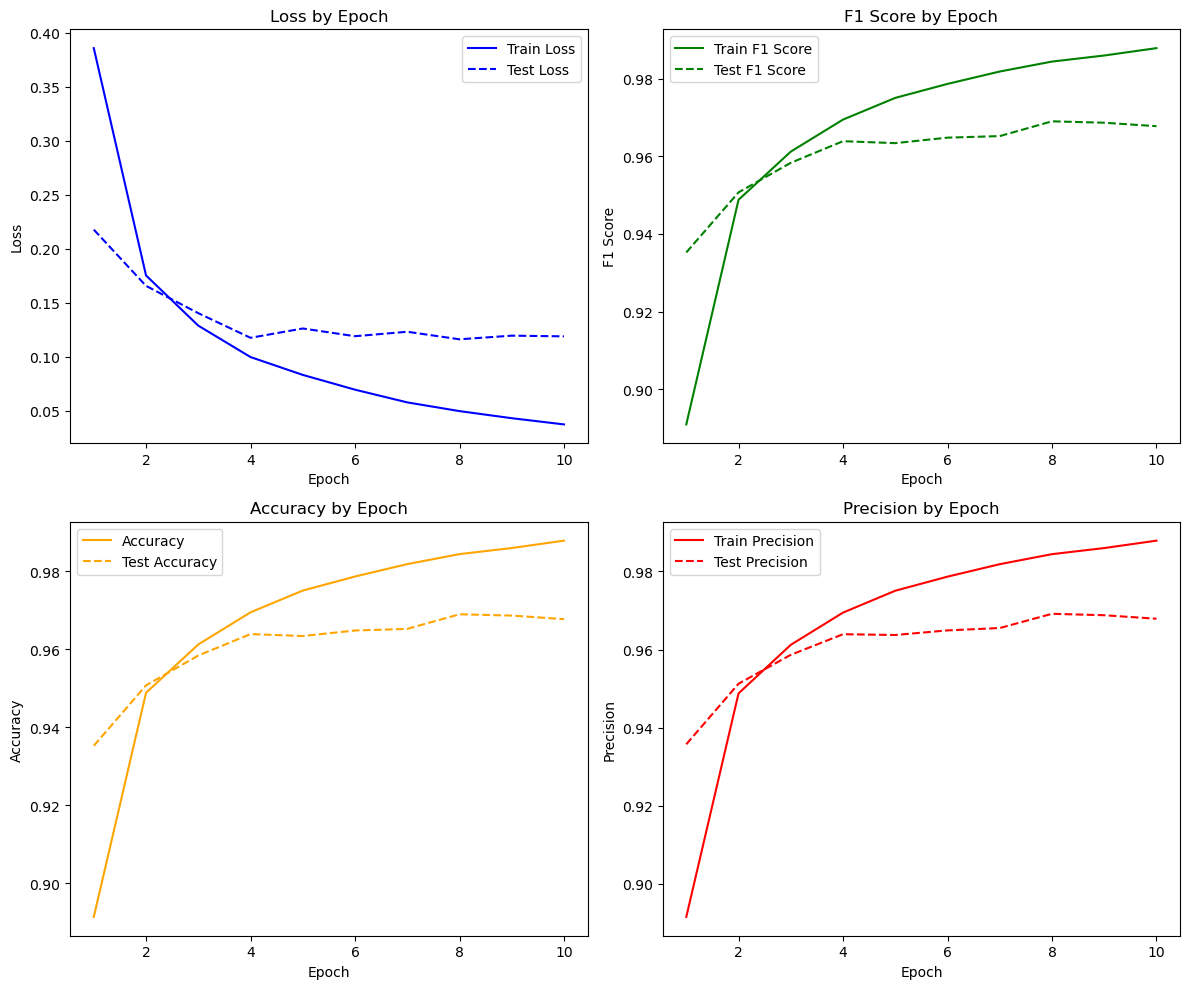

Epoch [1/10], Loss: 0.8672, F1 Score: 0.720, Accuracy: 0.723, Precision: 0.721, AUROC: 0.955
Epoch [2/10], Loss: 0.2177, F1 Score: 0.937, Accuracy: 0.937, Precision: 0.937, AUROC: 0.996
Epoch [3/10], Loss: 0.1346, F1 Score: 0.959, Accuracy: 0.959, Precision: 0.959, AUROC: 0.999
Epoch [4/10], Loss: 0.0975, F1 Score: 0.971, Accuracy: 0.971, Precision: 0.971, AUROC: 0.999
Epoch [5/10], Loss: 0.0769, F1 Score: 0.977, Accuracy: 0.977, Precision: 0.977, AUROC: 0.999
Epoch [6/10], Loss: 0.0615, F1 Score: 0.981, Accuracy: 0.981, Precision: 0.981, AUROC: 1.000
Epoch [7/10], Loss: 0.0495, F1 Score: 0.984, Accuracy: 0.984, Precision: 0.984, AUROC: 1.000
Epoch [8/10], Loss: 0.0412, F1 Score: 0.987, Accuracy: 0.987, Precision: 0.987, AUROC: 1.000
Epoch [9/10], Loss: 0.0367, F1 Score: 0.988, Accuracy: 0.988, Precision: 0.988, AUROC: 1.000
Epoch [10/10], Loss: 0.0308, F1 Score: 0.990, Accuracy: 0.990, Precision: 0.990, AUROC: 1.000


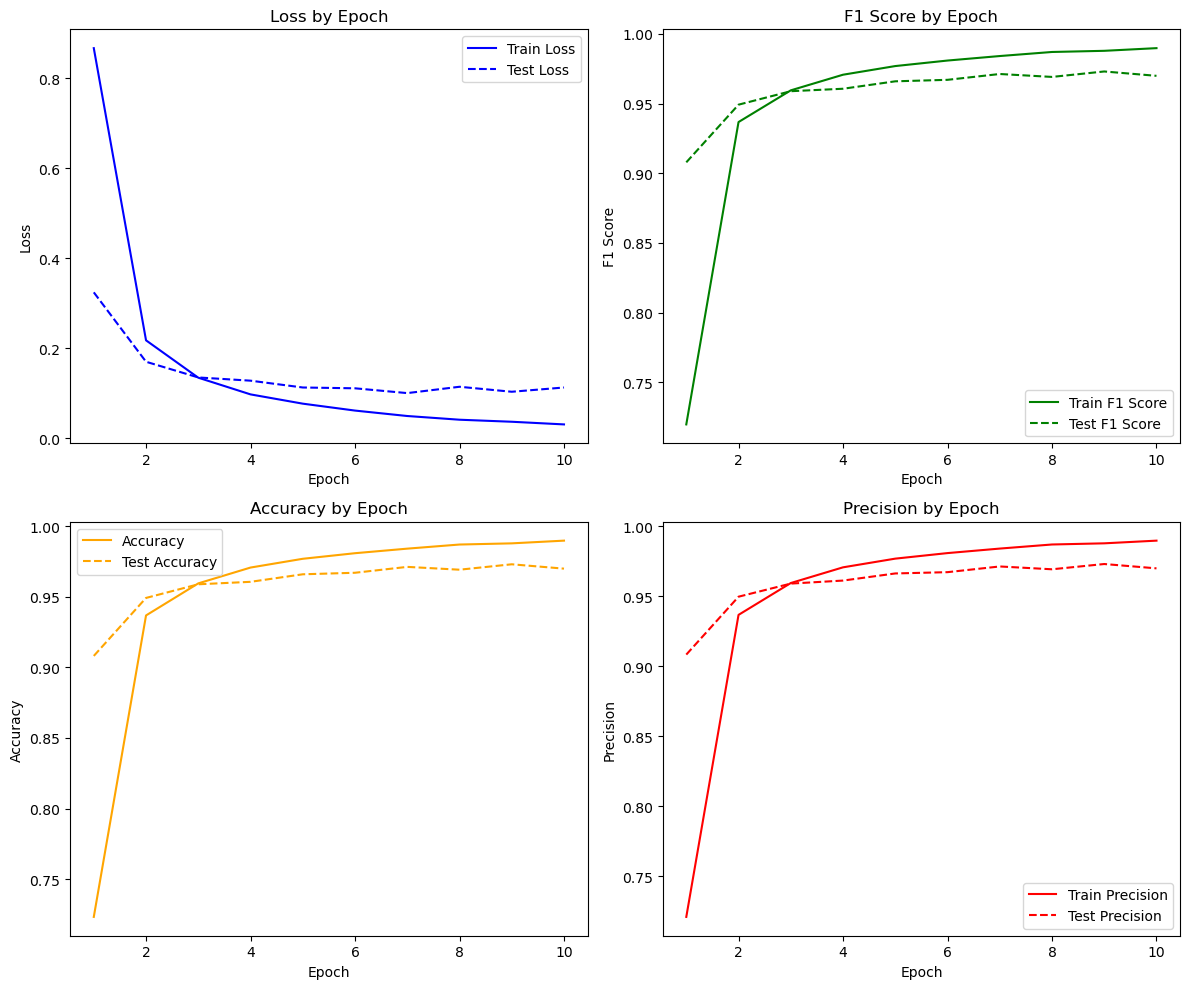

,Model Name,Loss,F1 Score,Accuracy,Precision,AUROC,Epochs
0,one_hidden_layer_nn,0.119000,0.967775,0.967750,0.967895,0.999103,10
1,one_hidden_layer_nn_dropout,0.112844,0.969878,0.969917,0.969937,0.999198,10


In [14]:
from tabularnn import models
importlib.reload(models)
importlib.reload(train)

criterion = nn.CrossEntropyLoss()
num_epochs = 10
performance_data = []


for model_name, model in models.models.items():
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    model, loss, f1, acc, precision, auc = train.train_model(
        model, 
        dataloader, 
        val_dataloader=val_dataloader, 
        model_name=model_name, 
        criterion=criterion, 
        optimizer=optimizer, 
        num_epochs=num_epochs
    )

    performance_data.append({
        'Model Name': model_name,
        'Loss': loss,          
        'F1 Score': f1,        
        'Accuracy': acc,       
        'Precision': precision,
        'AUROC': auc,          
        'Epochs': num_epochs      
    })

performance_df = pd.DataFrame(performance_data)
performance_df.to_csv(os.path.join('models', 'performance_df.csv'), index=False)
display(performance_df)


# Evaluate Best Model on Test Data

In [ ]:
test_df = pd.read_csv(os.path.join('data', 'test.csv'))
X_test = test_df.iloc[:, 1:].values  # features
y_test = test_df.iloc[:, 0].values   # first column is labels
test_dataset = dataprep.TabularDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)